In [1]:
import numpy as np
from scipy.linalg import expm
from qutip import create, destroy, sigmap, sigmam, tensor, qeye, sigmaz
import matplotlib.pyplot as plt

In [2]:
sigmam()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [3]:
sigmap()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [8]:
1/2*(sigmaz() + qeye(2))

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [2]:
def tp(A,B):
  # Producto tensorial abreviado:
  return np.kron(A,B)

In [3]:
def H_s(n_fotons, w_x, Delta, g):

  
  # Matrices Identidad:
  # ===========================
  I_campo = qeye(n_fotons).full() # Campo
  I_qdot = qeye(2).full() # Punto cuantico
  
  # Energia del punto cuantico:
  # ============================
  operador_materia = (1/2)*(sigmaz() + qeye(2)).full()
  #operador_materia = (1/2)*(sigmaz()).full()
  h_1 = w_x * tp(operador_materia, I_campo)
  
  # Energia del campo:
  # ============================
  operador_campo = create(n_fotons) * destroy(n_fotons)
  h_2 = (w_x - Delta) * tp(I_qdot, operador_campo.full())
  
  H0 = h_1 + h_2
  
  # Energia de interaccion campo - materia:
  # ============================
  # Aca puede exidtir un error
  H_XC = g * (tp(sigmam().full(), create(n_fotons).full()) + tp( sigmap().full(), destroy(n_fotons).full()))
  #H_XC =  (g * (tensor(destroy(n_fotons),sigmap()) + tensor(create(n_fotons),sigmam()))).full()
  
  
  # Hamoltoniano def:
  # ============================
  H = H0 + H_XC
  
  return H

In [ ]:
a = tensor(I_materia, destroy(N_fotones))    # Operador de aniquilación del campo
adag = a.dag()
sigma = tensor(destroy(N_materia), I_campo)  # Operador de aniquilación de materia
sigma_dag = sigma.dag()

# Definir el Hamiltoniano
H0 = w_x * sigma_dag * sigma + (w_x - Delta) * adag * a
H_xc = g * (sigma * adag + a * sigma_dag)
H = H0 + H_xc

In [4]:
def H_s(N_fotones, w_x, Delta, g):
  I_campo = qeye(N_fotones) # Campo
  I_materia  = qeye(2)

  
  # Matrices Identidad:
  # ===========================
  a = tensor(I_materia, destroy(N_fotones))    # Operador de aniquilación del campo
  adag = a.dag()
  sigma = tensor(destroy(2), I_campo)  # Operador de aniquilación de materia
  sigma_dag = sigma.dag()

  # Definir el Hamiltoniano
  H0 = w_x * sigma_dag * sigma + (w_x - Delta) * adag * a
  H_xc = g * (sigma * adag + a * sigma_dag)
  H = H0 + H_xc
  
  return H

In [5]:
def Liouvillian(H, n_fotons, kapa, gamma, P):
  
  # Dimencion de op densidad:
  # =========================
  d = 2*n_fotons
  
  # Matrices Identidad
  # =========================
  I_rho = qeye(d) # Sistema
  I_campo = qeye(n_fotons) # Campo
  I_materia  = qeye(2)
  
  # Definicion de operadores
  # ==========================
  a = tensor(I_materia, destroy(n_fotons))    # Operador de aniquilación del campo
  adag = a.dag()
  sigma = tensor(destroy(2), I_campo)  # Operador de aniquilación de materia
  sigma_dag = sigma.dag()
  
  # Creacion del super operador:
  # ==========================
  #H = H.full()
  # Hamiltoniano:
  super_H = -1j * ( tensor(I_rho, H) - tensor(H.dag() , I_rho))
  
  
  Super_L1 = 2 * tensor(adag.dag() , a) - tensor(I_rho, adag@a) - tensor((adag@a).dag() , I_rho)
  Super_L2 = 2 * tensor(sigma_dag.dag() , sigma) - tensor(I_rho, sigma_dag@sigma) - tensor((sigma_dag@sigma).dag() , I_rho)
  Super_L3 = 2 * tensor(sigma.dag() , sigma_dag) - tensor(I_rho, sigma@sigma_dag) - tensor((sigma@sigma_dag).dag() , I_rho)
  
  # Louvilliano:
  L = super_H + (np.sqrt(kapa)/2)*Super_L1 + (np.sqrt(gamma)/2)*Super_L2 + (np.sqrt(P)/2)*Super_L3
  
  return L.full()

In [6]:
N_fotones = 4  # Ajustar según el problema
w_x, Delta, g = 2.0, 0.1, 0.09  # Definir valores adecuados
kapa, gamma, Pc = 0.5, 0.1, 0.029  # Parámetros de disipación

In [7]:
fc = 1.519
# Parámetros
N_fotones = 4  # Ajustar según el problema
w_x, Delta, g = 1000.0*fc, 5*fc, 1*fc  # Definir valores adecuados
kapa, gamma, Pc = 0.5*fc, 0.1*fc, 0.039  # Parámetros de disipación

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from qutip import qeye, sigmaz
fc = 1
# Parámetros
N_fotones = 4  # Ajustar según el problema
w_x, Delta, g = 1000.0*fc, 5*fc, 1*fc  # Definir valores adecuados
kapa, gamma, Pc = 0.5*fc, 0.1*fc, 1*fc  # Parámetros de disipación

# Crear la matriz densidad inicial
rho0 = np.zeros((2 * N_fotones, 2 * N_fotones))
rho0[0, 0] = 1  # Inicialmente en estado base

# Creación del operador Sz
I_campo = qeye(N_fotones).full()
s_z = sigmaz().full()
Sz = np.kron(s_z, I_campo)  # Producto tensorial

# =================================
# Método para la dinámica del sistema
def dynamics(tf, sample):
    times = np.linspace(0, tf, sample)
    dt = times[1] - times[0]
    d = len(rho0)

    # Inicializar estado en vector columna
    v_rho_t = np.reshape(rho0, (d**2, 1))
    
    rho_time = []
    
    # Definir Hamiltoniano y superoperador
    Ht = H_s(N_fotones, w_x, Delta, g)  # Asegurar que esta función esté bien definida
    superop = Liouvillian(Ht, N_fotones, kapa, gamma, Pc)  # Definir Liouvilliano
    P = expm(superop * dt)

    # Propagación de la ecuación de Lindblad
    for _ in range(len(times)):  
        rho_t = np.reshape(v_rho_t, (d, d))
        rho_time.append(rho_t.copy())  # Guardar la traza temporal
        v_rho_t = P @ v_rho_t  # Evolución en el tiempo

    return times, rho_time

# Tiempo total de simulación
tf = 50
times, trazas = dynamics(tf, sample=10000)

# Parámetro para la gráfica
y_max_zoom = 0.005  

# Crear figura con dos subgráficos
fig, (ax, av) = plt.subplots(2, 1, figsize=(5, 7), gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0.1)

# Graficar las poblaciones de los estados diagonales
for j in range(len(trazas[0])):  
    ax.plot(times, [r[j, j] for r in trazas], label=f'Estado {j}')

ax.set_ylabel(r'$\rho_{jj}(t)$', usetex=True, fontsize=10)
ax.legend(ncol=2, fontsize=8)  

# Graficar con zoom en la figura inferior
for j in range(len(trazas[0])):  
    av.plot(times, [r[j, j] for r in trazas], label=f'Estado {j}')

av.set_xlabel(r'$t$', usetex=True, fontsize=10)
av.set_ylabel(r'$v(t)$', usetex=True, fontsize=10)
av.set_ylim(0, y_max_zoom)

plt.show()


ValueError: incompatible dimensions [[8, 2, 4], [8, 2, 4]] and [[2, 4, 8], [2, 4, 8]]

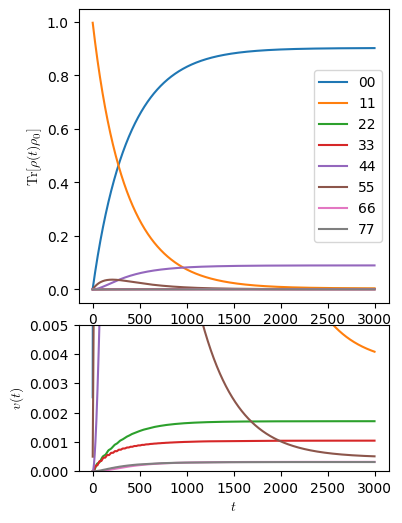

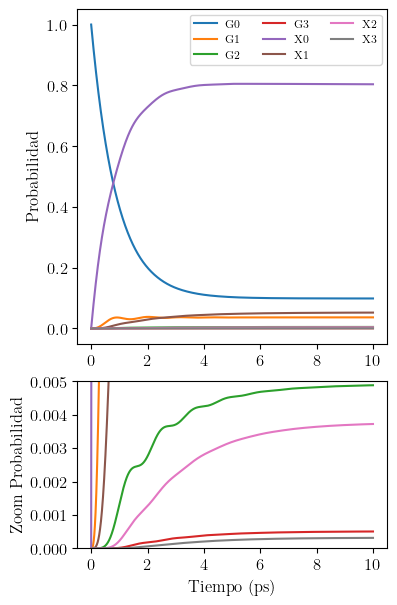

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parámetros del sistema (hbar = 1)
w_x = 1000       # Frecuencia excitónica
Delta = 5     # Desplazamiento
g = 1        # Acoplamiento excitón-cavidad
kappa = 0.5      # Pérdida de fotones
gamma = 0.1     # Decaimiento del excitón
P = 1        # Bombeo del excitón

# Dimensiones del sistema
N_fotones = 4  # Niveles del campo
N_materia = 2  # Base {|G⟩, |X⟩}

# Operadores cuánticos
I_campo = qeye(N_fotones)
I_materia = qeye(N_materia)

a = tensor(I_materia, destroy(N_fotones))    # Operador de aniquilación del campo
adag = a.dag()
sigma = tensor(destroy(N_materia), I_campo)  # Operador de aniquilación de materia
sigma_dag = sigma.dag()

# Definir el Hamiltoniano
H0 = w_x * sigma_dag * sigma + (w_x - Delta) * adag * a
H_xc = g * (sigma * adag + a * sigma_dag)
H = H0 + H_xc

# Estado inicial: materia en |G⟩ y campo en vacío
rho0 = fock_dm(N_materia, 0)
rho_campo = fock_dm(N_fotones, 0)
rho_inicial = tensor(rho0, rho_campo)

# Operadores de colapso (términos de Lindblad)
C_kappa = np.sqrt(kappa) * a
C_gamma = np.sqrt(gamma) * sigma
C_P = np.sqrt(P) * sigma_dag
colapsos = [C_kappa, C_gamma, C_P]

# Tiempos de integración (ps)
t_list = np.linspace(0, 10, 10000)

options = Options(nsteps=50000)  # Aumenta el número de pasos permitidos
result = mesolve(H, rho_inicial, t_list, colapsos, [], options=options)

# Extraer matrices de densidad en todos los tiempos
rho_t = result.states  # Lista con rho(t)

# Extraer los elementos diagonales (probabilidades de cada estado)
pop_matriz = np.array([rho.diag() for rho in rho_t])  # Matriz con todas las poblaciones

# Crear etiquetas personalizadas en el orden deseado
num_niveles = (pop_matriz.shape[1] - 2) // 2  # Se asume estructura {G, 0, G1,...,Gn, X0, ..., Xn}
labels = [f"G{i}" for i in range(num_niveles + 1)] + [f"X{i}" for i in range(num_niveles + 1)]

# Parámetro para la gráfica (zoom en el eje Y)
y_max_zoom = 0.005  

# Crear figura con dos subgráficos
fig, (ax, av) = plt.subplots(2, 1, figsize=(4, 7), gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0.15)

# Gráfica superior: Poblaciones de los estados en toda la escala
for i in range(pop_matriz.shape[1]):
    ax.plot(t_list, pop_matriz[:, i], label=labels[i])

ax.set_ylabel("Probabilidad")
ax.legend(ncol=3, fontsize=8)  # Se ajusta a 3 columnas para mejor visualización

# Gráfica inferior: Zoom en el eje Y
for i in range(pop_matriz.shape[1]):
    av.plot(t_list, pop_matriz[:, i], label=labels[i])

av.set_xlabel("Tiempo (ps)")
av.set_ylabel("Zoom Probabilidad")
av.set_ylim(0, y_max_zoom)  # Aplicar zoom en el eje Y

plt.show()


In [219]:
rho_inicial

Quantum object: dims=[[2, 4], [2, 4]], shape=(8, 8), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

['$\\rho_{00}$', '$\\rho_{11}$', '$\\rho_{22}$', '$\\rho_{33}$', '$\\rho_{44}$', '$\\rho_{55}$', '$\\rho_{66}$', '$\\rho_{77}$']


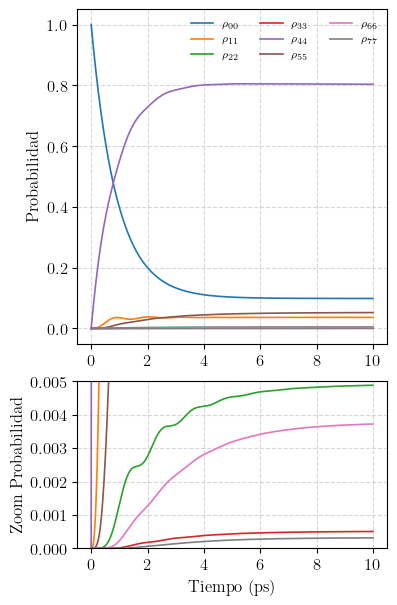

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro para la gráfica (zoom en el eje Y)
y_max_zoom = 0.005  

# Simulación de datos (esto debes reemplazarlo con tus datos reales)
N = 8  # Número de estados

labels = [rf"$\rho_{{{i}{i}}}$" for i in range(N)]

print(labels)  # Verifica la salida


# Configuración de estilo LaTeX
plt.rcParams.update({
    "text.usetex": True,  
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 12,
    "legend.fontsize": 10
})

# Crear figura con dos subgráficos
fig, (ax, av) = plt.subplots(2, 1, figsize=(4, 7), gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0.15)

# Gráfica superior: Poblaciones de los estados en toda la escala
for i in range(pop_matriz.shape[1]):
    ax.plot(t_list, pop_matriz[:, i], label=labels[i], linewidth=1.2)

ax.set_ylabel(r"Probabilidad")
ax.legend(ncol=3, fontsize=8, loc="upper right", frameon=False)  # Mejor ubicación de leyenda
ax.grid(True, linestyle="dashed", alpha=0.5)

# Gráfica inferior: Zoom en el eje Y
for i in range(pop_matriz.shape[1]):
    av.plot(t_list, pop_matriz[:, i], label=labels[i], linewidth=1.2)

av.set_xlabel(r"Tiempo (ps)")
av.set_ylabel(r"Zoom Probabilidad")
av.set_ylim(0, y_max_zoom)  # Aplicar zoom en el eje Y
av.grid(True, linestyle="dashed", alpha=0.5)

plt.show()
